This jupyter notebook provides an overview for the basic functionality of the Fumagalli_Motta_Tarantino_2020 package. I recommend, that you do not run all the cells at once since this takes some time.

# Further Resources

- Documentation of the whole package $\rightarrow$ [Docs](https://manuelbieri.ch/Fumagalli_2020/)
- Source of the package $\rightarrow$ [GitHub](https://github.com/manuelbieri/Fumagalli_2020)
- Download page $\rightarrow$ [PyPI](https://pypi.org/project/Fumagalli-Motta-Tarantino-2020/)

# Install the Package

Any requirements which are needed, are installed automatically with the package.


In [1]:
# setup environment

# sets the backend for matplotlib
%matplotlib ipympl

# increase output quality of plots
%config InlineBackend.figure_format ='svg'

# install and import models
# %pip install Fumagalli-Motta-Tarantino-2020  # install the package from PyPI
# %pip uninstall Fumagalli-Motta-Tarantino-2020  # uninstall the package

import Fumagalli_Motta_Tarantino_2020 as FMT20  # import the package

## Advanced Installation

- Install widgets for interactive use $\Rightarrow$ see Interactive.ipynb
```bash
pip install Fumagalli-Motta-Tarantino-2020[interactive]
```

- Install additional style (SciencePlots), this requires a valid installation of LATEX
```bash
pip install Fumagalli-Motta-Tarantino-2020[style]
```

# Set up a valid Model

Whenever the parameters are not valid, an error message will appear with the details about the failure. Have a look at the available models [here](https://manuelbieri.ch/Fumagalli_2020/Fumagalli_Motta_Tarantino_2020/Models.html).

In [2]:
model = FMT20.OptimalMergerPolicy()

# print a summary of the model
print(model)

Merger Policy: Strict
Is start-up credit rationed?: False
Type of early takeover attempt: No bid
Is the early takeover approved?: False
Does the owner attempt the development?: True
Is the development successful?: True
Type of late takeover attempt: No bid
Is the late takeover approved?: False
Optimal merger policy: Strict


# Visualizations

Have a look at the available visualizations [here](https://manuelbieri.ch/Fumagalli_2020/Fumagalli_Motta_Tarantino_2020/Visualizations.html).

## I. Timeline of Model

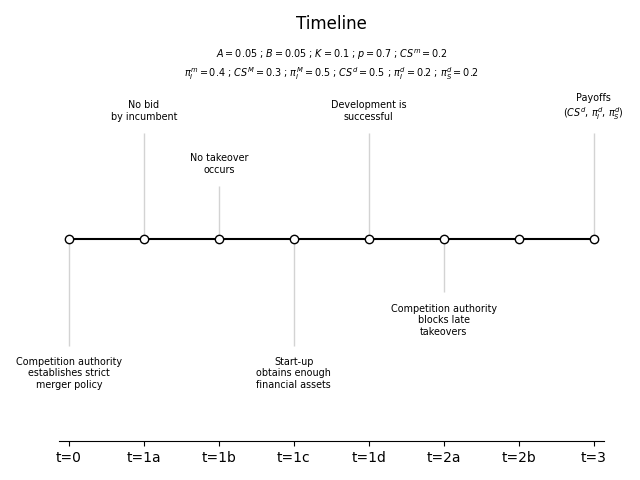

In [3]:
visualizer = FMT20.Timeline(model)
visualizer.plot();

## II. Outcomes over a Range of Assets

Show all outcomes with their respective color in the legend.

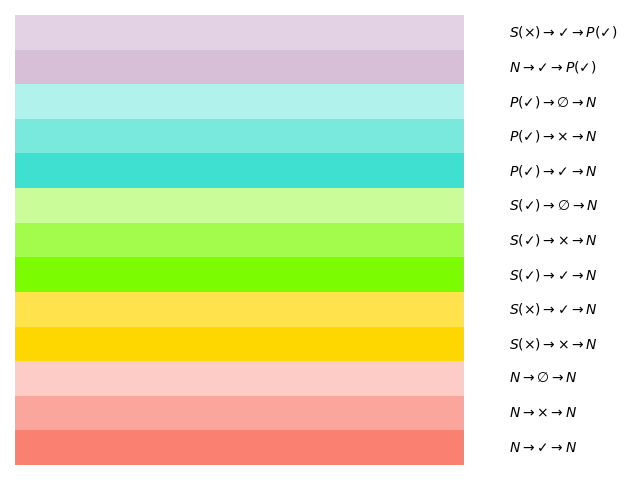

In [4]:
FMT20.AssetRange.plot_label_colors();

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Outcome dependent on Start-up Assets'}, xlabel='Cumulative Distribution Value of Assets $F(A)$', ylabel='Merger Policy'>)

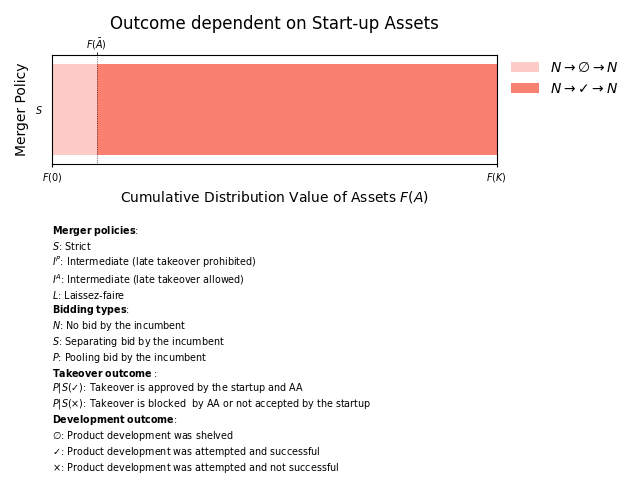

In [5]:
visualizer = FMT20.AssetRange(model)
visualizer.plot();

## III. Outcomes for different Policies

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Outcome dependent on Start-up Assets'}, xlabel='Cumulative Distribution Value of Assets $F(A)$', ylabel='Merger Policy'>)

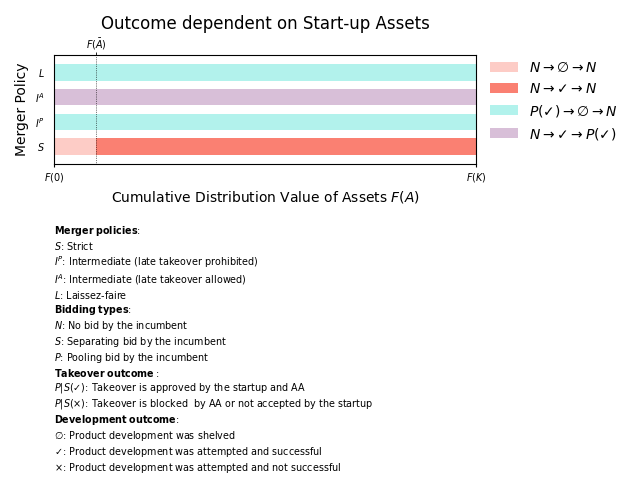

In [6]:
visualizer = FMT20.MergerPoliciesAssetRange(model)
visualizer.plot();

## IV. Payoffs

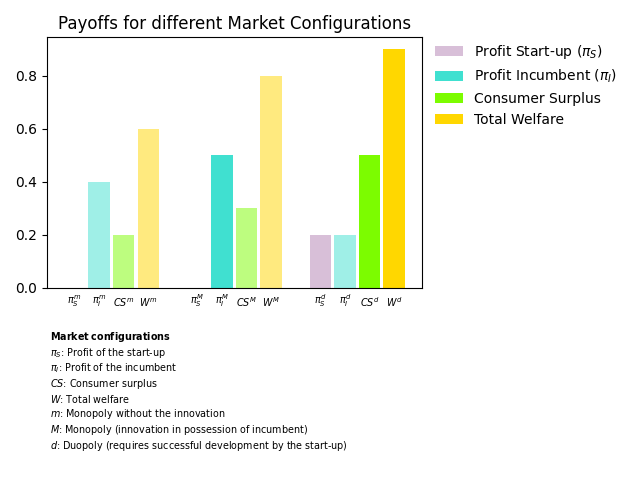

In [7]:
visualizer = FMT20.Payoffs(model)
visualizer.plot();

## V. Overview

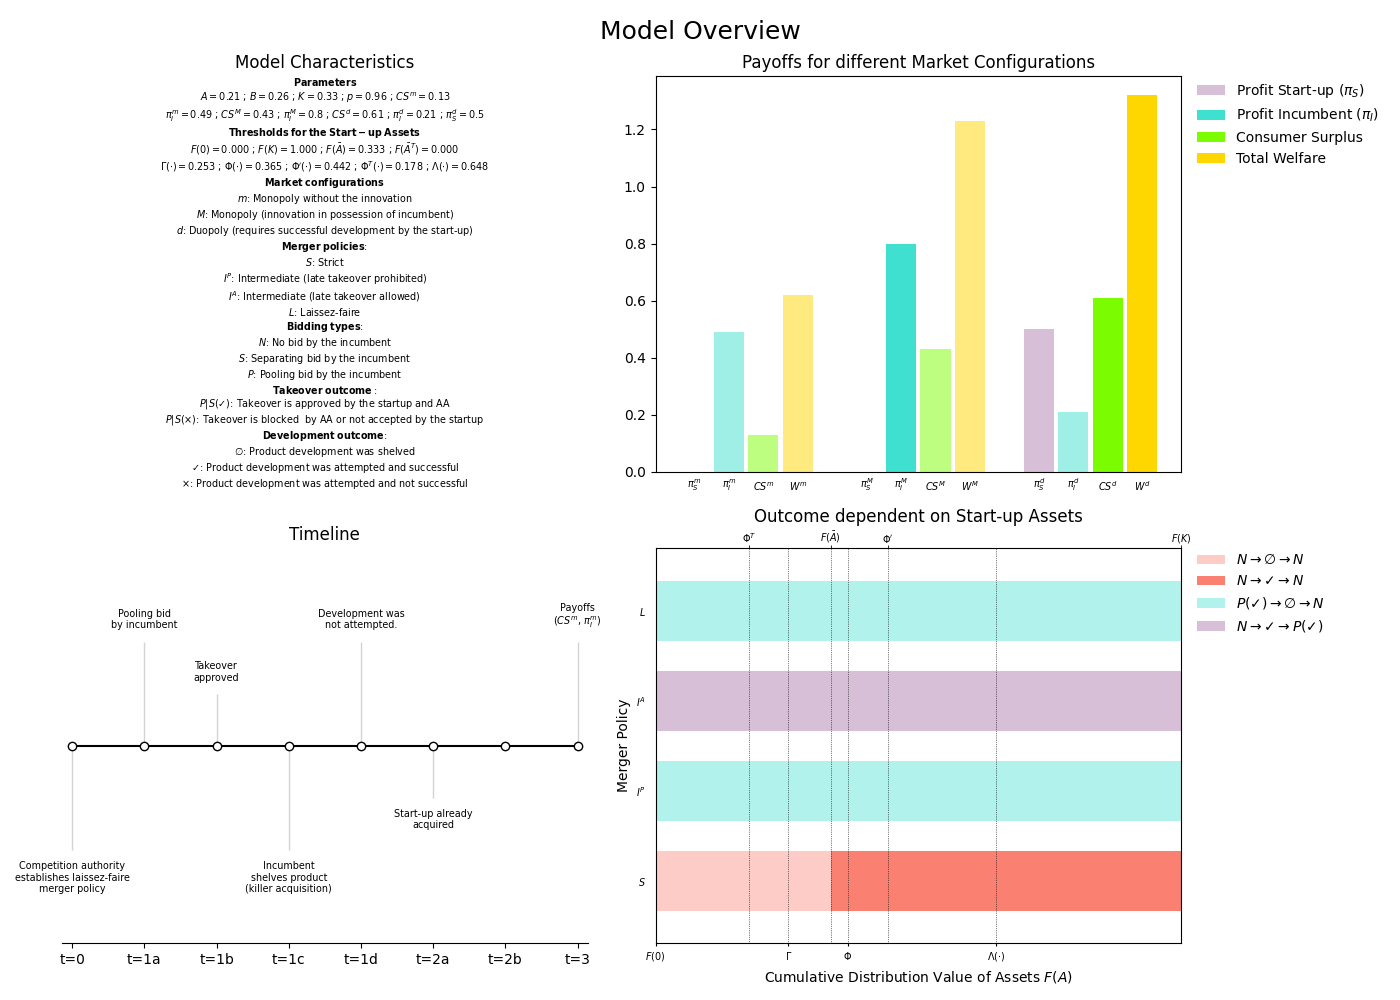

In [12]:
overview = FMT20.Overview(model)
overview.plot();

### Advanced Use

Note: The package SciencePlots is required, to use another style besides the default one.

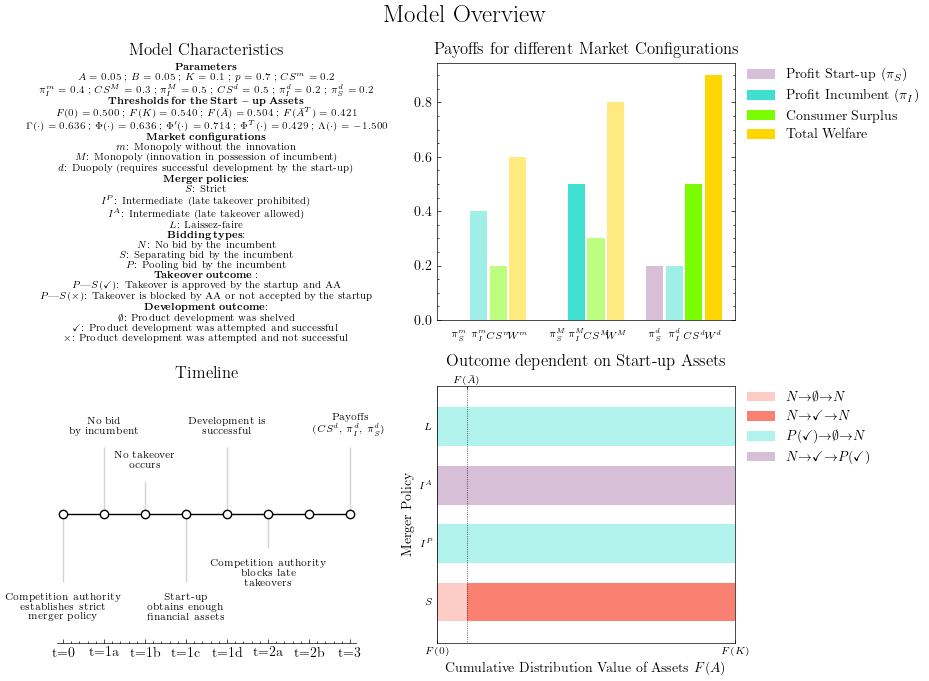

In [9]:
# Here you can define general parameters for the plot
overview_advanced = FMT20.Overview(model, default_style=False, figsize=(9.5, 7))

# Here you can define specific parameters for the plot
overview_advanced.plot(fontsize=7)

overview_advanced.fig.set_label("Fumagalli et al. (2020)");

# Advanced Use

## I. Load Configuration

The submodule `Fumagalli_Motta_Tarantino_2020.Configurations` provides a set of configurations with specific characteristics $\Rightarrow$ see Configurations.ipynb for the available configuration.

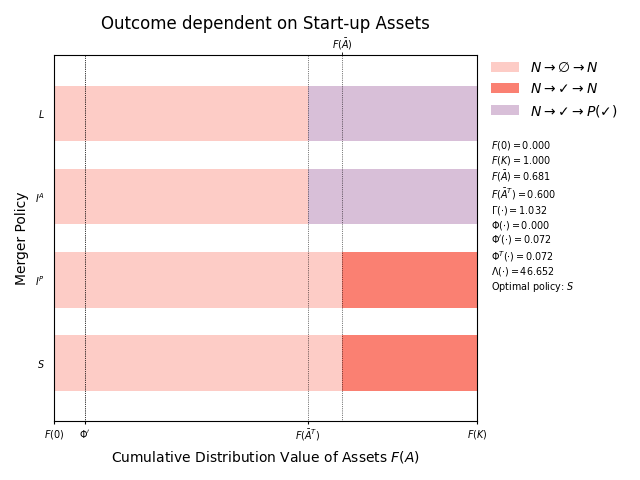

In [13]:
# specify the id of the configuration
p = FMT20.LoadParameters(config_id=33)

# by default every configuration uses FMT20.MergerPolicies.Strict
p.set_merger_policy(FMT20.MergerPolicies.Laissez_faire)

# note the use of the stars
model = FMT20.ProCompetitive(
    **p(), asset_distribution=FMT20.Distributions.UniformDistribution
)
FMT20.MergerPoliciesAssetRange(model).plot(
    legend=False, thresholds=True, optimal_policy=True, y_offset=-10
);

## II. Find Configuration

If you wish to find another configuration, just let the computer do it (this can take a while).

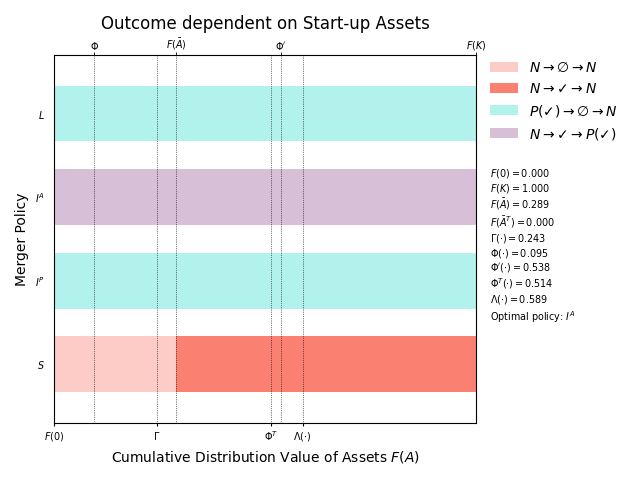

In [14]:
config = FMT20.RandomConfig(
    merger_policy=FMT20.MergerPolicies.Laissez_faire,
    is_killer_acquisition=True,
    intermediate_optimal=True,
).find_config()

model = FMT20.OptimalMergerPolicy(
    **config(), asset_distribution=FMT20.Distributions.UniformDistribution
)

FMT20.MergerPoliciesAssetRange(model).plot(
    legend=False, thresholds=True, optimal_policy=True, y_offset=-30
);